In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import random
from sgmcmcjax.kernels import build_sgld_kernel, build_sghmc_kernel, build_sgnht_kernel
from sgmcmcjax.kernels import build_sgldCV_kernel, build_sghmcCV_kernel, build_sgnhtCV_kernel

import context
from models.bayesian_NN.NN_model import logprior, loglikelihood, init_network, accuracy_BNN
from models.bayesian_NN.NN_data import X_train, y_train, X_test, y_test
from models.bayesian_NN.util import load_NN_MAP, add_noise_NN_params

from tuning.gridsearch import run_gridsearch

# NN: hyperparameter tuning

todo: why is gridsearch for sgld different to old gridsearch?



In [2]:


data = (X_train, y_train)

error_fn = lambda sam: -accuracy_BNN(sam[::20], X_test, y_test)

# Niters = 1000
key = random.PRNGKey(0)

Niters = 1000
key, subkey = random.split(key)
params_IC = add_noise_NN_params(subkey, load_NN_MAP(), 1.)
batch_size = int(0.1*X_train.shape[0])
centering_value = load_NN_MAP()

grid_params = {"log_dt": -jnp.arange(2., 8., 0.5)}

## grid search

- sgld
- sgldCV
- sghmc
- sghmcCV
- sgnht
- sgnhtCV

Running gridsearch for dt
Number of grid points: 12
{'dt': 0.01}



{'dt': 0.0031622776}



{'dt': 0.001}



{'dt': 0.00031622776}



{'dt': 1e-04}



{'dt': 3.1622778e-05}



{'dt': 1e-05}



{'dt': 3.1622776e-06}



{'dt': 1e-06}



{'dt': 3.1622776e-07}



{'dt': 1e-07}



{'dt': 3.1622776e-08}



Running time for gridsearch: 349 sec

Optimal hyperparameter: {'dt': 0.00031622776}


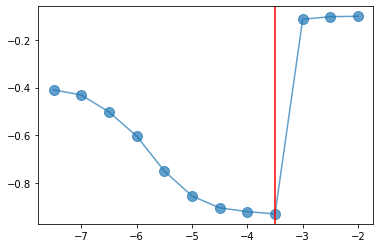

In [3]:
build_kernel = lambda dt: build_sgld_kernel(dt, loglikelihood, logprior, data, batch_size)

list_hyperparams, ll_list = run_gridsearch(key, build_kernel, error_fn, Niters, params_IC, grid_params)

log_dt_grid = [np.log10(elem['dt']) for elem in list_hyperparams]
plt.plot(log_dt_grid, ll_list, marker="o", markersize=10, alpha=0.7)
plt.axvline(log_dt_grid[np.nanargmin(ll_list)], c='r')

print(f"\nOptimal hyperparameter: {list_hyperparams[np.nanargmin(ll_list)]}")

Running gridsearch for dt
Number of grid points: 12
{'dt': 0.01}



{'dt': 0.0031622776}



{'dt': 0.001}



{'dt': 0.00031622776}



{'dt': 1e-04}



{'dt': 3.1622778e-05}



{'dt': 1e-05}



{'dt': 3.1622776e-06}



{'dt': 1e-06}



{'dt': 3.1622776e-07}



{'dt': 1e-07}



{'dt': 3.1622776e-08}



Running time for gridsearch: 600 sec

Optimal hyperparameter: {'dt': 0.00031622776}


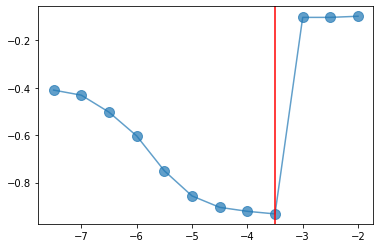

In [4]:
build_kernel = lambda dt: build_sgldCV_kernel(dt, loglikelihood, logprior, data, batch_size, centering_value)

list_hyperparams, ll_list = run_gridsearch(key, build_kernel, error_fn, Niters, params_IC, grid_params)

log_dt_grid = [np.log10(elem['dt']) for elem in list_hyperparams]
plt.plot(log_dt_grid, ll_list, marker="o", markersize=10, alpha=0.7)
plt.axvline(log_dt_grid[np.nanargmin(ll_list)], c='r')

print(f"\nOptimal hyperparameter: {list_hyperparams[np.nanargmin(ll_list)]}")

In [5]:
build_kernel = lambda dt, L: build_sghmc_kernel(dt, L, loglikelihood, logprior, data, batch_size)

grid_params = {'log_dt': -jnp.arange(2., 8., 0.5), "L": [5,10]}
list_hyperparams, ll_list = run_gridsearch(key, build_kernel, error_fn, Niters, params_IC, grid_params)

print(f"\nOptimal hyperparameter: {list_hyperparams[np.nanargmin(ll_list)]}")

Running gridsearch for L, dt
Number of grid points: 24
{'L': 5, 'dt': 0.01}



{'L': 5, 'dt': 0.0031622776}



{'L': 5, 'dt': 0.001}



{'L': 5, 'dt': 0.00031622776}



{'L': 5, 'dt': 1e-04}



{'L': 5, 'dt': 3.1622778e-05}



{'L': 5, 'dt': 1e-05}



{'L': 5, 'dt': 3.1622776e-06}



{'L': 5, 'dt': 1e-06}



{'L': 5, 'dt': 3.1622776e-07}



{'L': 5, 'dt': 1e-07}



{'L': 5, 'dt': 3.1622776e-08}



{'L': 10, 'dt': 0.01}



{'L': 10, 'dt': 0.0031622776}



{'L': 10, 'dt': 0.001}



{'L': 10, 'dt': 0.00031622776}



{'L': 10, 'dt': 1e-04}



{'L': 10, 'dt': 3.1622778e-05}



{'L': 10, 'dt': 1e-05}



{'L': 10, 'dt': 3.1622776e-06}



{'L': 10, 'dt': 1e-06}



{'L': 10, 'dt': 3.1622776e-07}



{'L': 10, 'dt': 1e-07}



{'L': 10, 'dt': 3.1622776e-08}



Running time for gridsearch: 3544 sec

Optimal hyperparameter: {'L': 10, 'dt': 1e-05}


In [6]:
build_kernel = lambda dt, L: build_sghmcCV_kernel(dt, L, loglikelihood, logprior, data, batch_size, centering_value)

grid_params = {'log_dt': -jnp.arange(2., 8., 0.5), "L": [5,10]}
list_hyperparams, ll_list = run_gridsearch(key, build_kernel, error_fn, Niters, params_IC, grid_params)

print(f"\nOptimal hyperparameter: {list_hyperparams[np.nanargmin(ll_list)]}")

Running gridsearch for L, dt
Number of grid points: 24
{'L': 5, 'dt': 0.01}



{'L': 5, 'dt': 0.0031622776}



{'L': 5, 'dt': 0.001}



{'L': 5, 'dt': 0.00031622776}



{'L': 5, 'dt': 1e-04}



{'L': 5, 'dt': 3.1622778e-05}



{'L': 5, 'dt': 1e-05}



{'L': 5, 'dt': 3.1622776e-06}



{'L': 5, 'dt': 1e-06}



{'L': 5, 'dt': 3.1622776e-07}



{'L': 5, 'dt': 1e-07}



{'L': 5, 'dt': 3.1622776e-08}



{'L': 10, 'dt': 0.01}



{'L': 10, 'dt': 0.0031622776}



{'L': 10, 'dt': 0.001}



{'L': 10, 'dt': 0.00031622776}



{'L': 10, 'dt': 1e-04}



{'L': 10, 'dt': 3.1622778e-05}



{'L': 10, 'dt': 1e-05}



{'L': 10, 'dt': 3.1622776e-06}



{'L': 10, 'dt': 1e-06}



{'L': 10, 'dt': 3.1622776e-07}



{'L': 10, 'dt': 1e-07}



{'L': 10, 'dt': 3.1622776e-08}



Running time for gridsearch: 6182 sec

Optimal hyperparameter: {'L': 10, 'dt': 1e-05}


In [4]:
-jnp.arange(5., 8., 0.5)


DeviceArray([-5. , -5.5, -6. , -6.5, -7. , -7.5], dtype=float32)

Running gridsearch for dt
Number of grid points: 6
{'dt': 1e-05}



{'dt': 3.1622776e-06}



{'dt': 1e-06}



{'dt': 3.1622776e-07}



{'dt': 1e-07}



{'dt': 3.1622776e-08}



Running time for gridsearch: 186 sec

Optimal hyperparameter: {'dt': 1e-05}


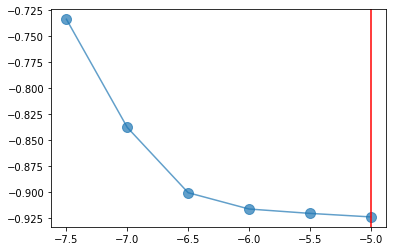

In [3]:
build_kernel = lambda dt: build_sgnht_kernel(dt, loglikelihood, logprior, data, batch_size)

# smaller grid for stability
grid_params = {"log_dt": -jnp.arange(5., 8., 0.5)} #-jnp.arange(2., 8., 0.5)}
list_hyperparams, ll_list = run_gridsearch(key, build_kernel, error_fn, Niters, params_IC, grid_params)

log_dt_grid = [np.log10(elem['dt']) for elem in list_hyperparams]
plt.plot(log_dt_grid, ll_list, marker="o", markersize=10, alpha=0.7)
plt.axvline(log_dt_grid[np.nanargmin(ll_list)], c='r')

print(f"\nOptimal hyperparameter: {list_hyperparams[np.nanargmin(ll_list)]}")

Running gridsearch for dt
Number of grid points: 12
{'dt': 0.01}



{'dt': 0.0031622776}



{'dt': 0.001}



{'dt': 0.00031622776}



{'dt': 1e-04}



{'dt': 3.1622778e-05}



{'dt': 1e-05}



{'dt': 3.1622776e-06}



{'dt': 1e-06}



{'dt': 3.1622776e-07}



{'dt': 1e-07}



{'dt': 3.1622776e-08}



Running time for gridsearch: 679 sec

Optimal hyperparameter: {'dt': 3.1622778e-05}


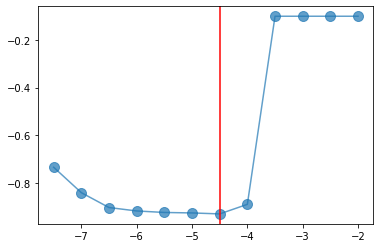

In [8]:
build_kernel = lambda dt: build_sgnhtCV_kernel(dt, loglikelihood, logprior, data, batch_size, centering_value)

grid_params = {"log_dt": -jnp.arange(2., 8., 0.5)}
list_hyperparams, ll_list = run_gridsearch(key, build_kernel, error_fn, Niters, params_IC, grid_params)

log_dt_grid = [np.log10(elem['dt']) for elem in list_hyperparams]
plt.plot(log_dt_grid, ll_list, marker="o", markersize=10, alpha=0.7)
plt.axvline(log_dt_grid[np.nanargmin(ll_list)], c='r')

print(f"\nOptimal hyperparameter: {list_hyperparams[np.nanargmin(ll_list)]}")